In [141]:
from qiskit import QuantumCircuit,transpile
from qiskit.quantum_info import Pauli,Operator, Statevector, partial_trace,DensityMatrix
from qiskit_aer.primitives import estimator
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

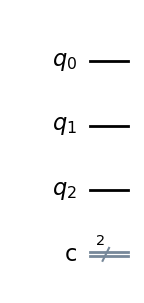

In [142]:
qc = QuantumCircuit(3,2)
qc.draw('mpl')

In [143]:
def qubit_alice(theta,qc):
    qc.ry(2*theta, 0) 


In [144]:
qubit_alice(np.pi/4,qc)#alice_qubit = (1/root2)*(|0> + |1>) : just for example

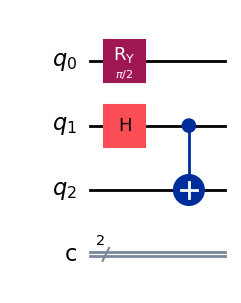

In [145]:
qc.h(1)
qc.cx(1,2)
qc.draw('mpl')

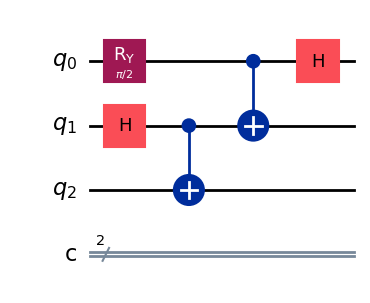

In [146]:
qc.cx(0,1)
qc.h(0)
qc.draw('mpl')

In [147]:

qc.save_statevector()

sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

sv = result.get_statevector()
state = Statevector(sv)


outcome, collapsed = state.measure([1, 0])#measuring the qubits of alice in the order 1,0 so that the entangled one comes first.
if(outcome == '01'):
    print("Alice_measurement in classical bits 10\n")
elif(outcome == '10'):
    print("Alice_measurement in classical bits 01\n")
else:
    print("Alice_measurement in classical bits ",outcome)#Note that I have used 1,0 so when I measure the outcome the first qubit comes from the entangled state and the second from alice 

bob_rho = partial_trace(collapsed, [0, 1])

# Print density matrix
print("Bob's qubit before applying the condition gates(density matrix):")#before applying any correction this is the bob's qubit's density matrix
print(bob_rho)


bob_sv = DensityMatrix(bob_rho).to_statevector()
print("\nBob's qubit as statevector without applying the condition gates:")
print(bob_sv)


Alice_measurement in classical bits 10

Bob's qubit before applying the condition gates(density matrix):
DensityMatrix([[0.5+0.000000e+00j, 0.5-6.123234e-17j],
               [0.5+6.123234e-17j, 0.5+0.000000e+00j]],
              dims=(2,))

Bob's qubit as statevector without applying the condition gates:
Statevector([0.70710678-8.65956056e-17j, 0.70710678+0.00000000e+00j],
            dims=(2,))


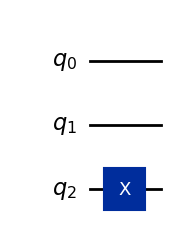

In [148]:
bob_circuit = QuantumCircuit(3)  #Made a new circuit so that I can apply my corrections on the collapsed state.

#Basic conditions to apply for bob
if outcome == '01':
    bob_circuit.x(2)
elif outcome == '10':
    bob_circuit.z(2)
elif outcome == '11':
    bob_circuit.x(2)
    bob_circuit.z(2)
bob_circuit.draw('mpl')



In [149]:
corrected_state = collapsed.evolve(bob_circuit)
bob_rho = partial_trace(corrected_state, [0, 1])

# Print density matrix
print("\nBob's final qubit (density matrix):")#before applying any correction this is the bob's qubit's density matrix
print(bob_rho)


bob_sv = DensityMatrix(bob_rho).to_statevector()
print("\nBob's final qubit as statevector:")
print(bob_sv)


Bob's final qubit (density matrix):
DensityMatrix([[0.5+0.000000e+00j, 0.5+6.123234e-17j],
               [0.5-6.123234e-17j, 0.5+0.000000e+00j]],
              dims=(2,))

Bob's final qubit as statevector:
Statevector([0.70710678+8.65956056e-17j, 0.70710678+0.00000000e+00j],
            dims=(2,))
